<a href="https://colab.research.google.com/github/Janina712/MLTSA22_JBoecher/blob/main/HW6/Lab_PoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

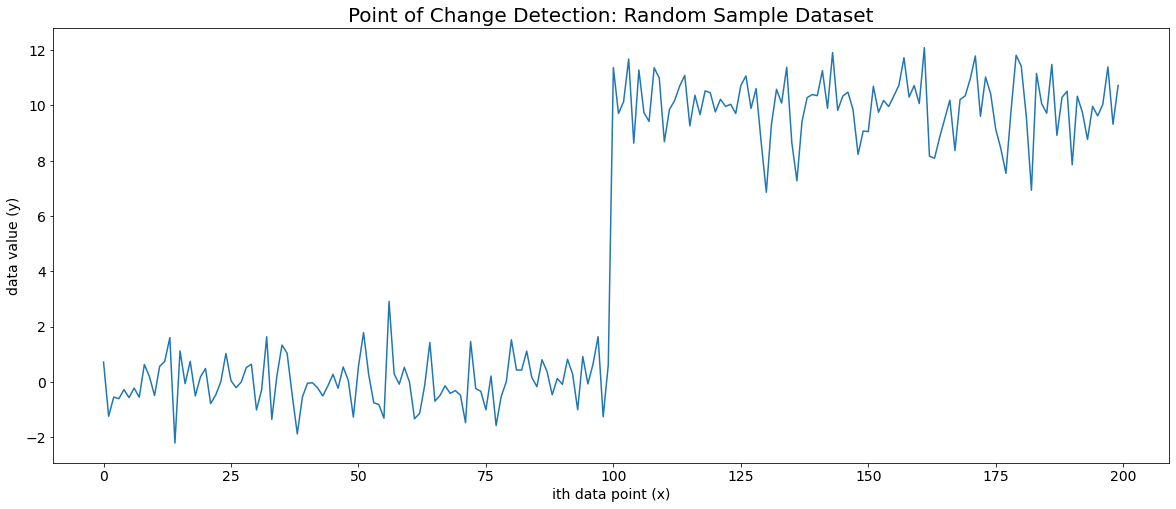

In [ ]:
# create data 
ts1 = np.random.randn(100)
ts2 = np.random.randn(100) + 10

ts = np.concatenate([ts1, ts2])
plt.figure(figsize=(20,8))
plt.plot(ts);
plt.title("Point of Change Detection: Random Sample Dataset", size = 20);
plt.xlabel("ith data point (x)", size = 14);
plt.ylabel("data value (y)", size = 14);
plt.yticks(size = 14);
plt.xticks(size = 14);

**Fig. 1.** Randomly generated data to test point of change detection (PoC) methods. PoC is introduced by concatinating 100 data points from a standard normal distribution with 100 data points from a standard normal distribution with mean shifted by 10. The PoC seems to be located at x = 100. The values of x =< 100 are centered around 0, while the values of x > 100 are centered around 10.  

# **Find PoC based on a Naive Mean Change Assessment:**

In [ ]:
mu = np.zeros(ts.shape[0])
mu2 = np.zeros(ts.shape[0])

for i in range(0,ts.shape[0]-1):
    mu[i] = ts[0:i+1].mean()
    mu2[i] = ts[i:].mean()


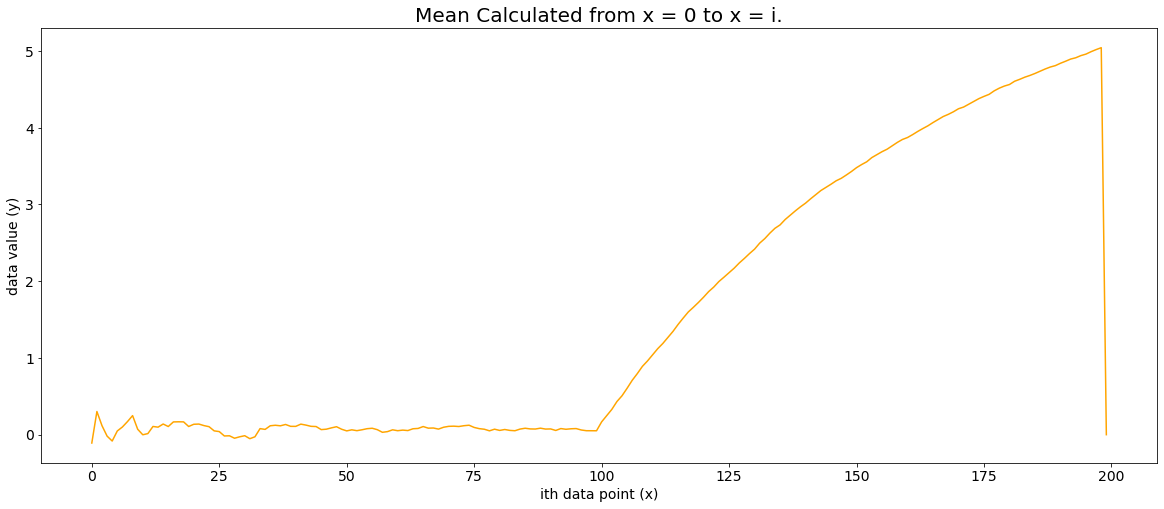

In [ ]:
# plot
plt.figure(figsize=(20,8));
plt.plot(mu, color = "orange") 
plt.title("Mean Calculated from x = 0 to x = i.",size =20)
plt.xlabel("ith data point (x)", size = 14);
plt.ylabel("data value (y)", size = 14);
plt.yticks(size = 14);
plt.xticks(size = 14);

**Fig. 2.** Mean calculated from x = 0 to x = i. Initial data points show extreme values because mean reflects only a small number of data points. The mean evens out to approximately zero until the PoC, after which the mean increases steadily to approximately 5. This is because the second half of the data has mean = 10. Averaged with the first half with mean = 0, the mean eventually comes out to 5. There is an increase after the point of change because increasingly more data points with mean ~ 10 are considered in the averaging procedure.  

**Comment: Why is there a drop at the end?**

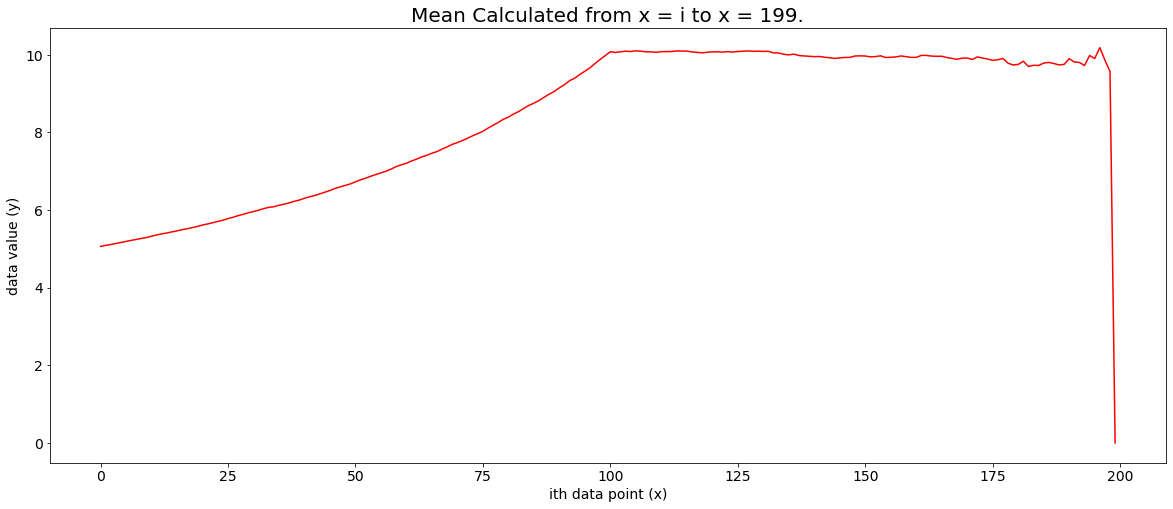

In [ ]:
# plot
plt.figure(figsize=(20,8));
plt.plot(mu2, color = "red") 
plt.title("Mean Calculated from x = i to x = 199.", size = 20);
plt.xlabel("ith data point (x)", size = 14);
plt.ylabel("data value (y)", size = 14);
plt.yticks(size = 14);
plt.xticks(size = 14);

**Fig. 3.** Mean Calculated from x = i to x = 199. Final data point shows extreme values because mean reflects only one data point. The mean starts out at approximately 5 and increases to 10. After the PoC, the mean remains at around 10. This is because the second half of the data has mean = 10. As fewer data points from the first half are considered in the average, the mean increases until only data points from the second half remain. 

In [ ]:
dif = mu-mu2

minval = np.nanmin(dif)
maxval = np.nanmax(dif)

print(f"The largest difference between mu and mu2 is {round(minval,1)} and the smallest difference is {maxval}.")

The largest difference between mu and mu2 is -9.9 and the smallest difference is 0.0.


In [ ]:
# Find index of PoC
poc_loc = np.where(dif == np.nanmin(dif))
print(f"The point of change is located at index x = {poc_loc[0][0]}.")

The point of change is located at index x = 99.


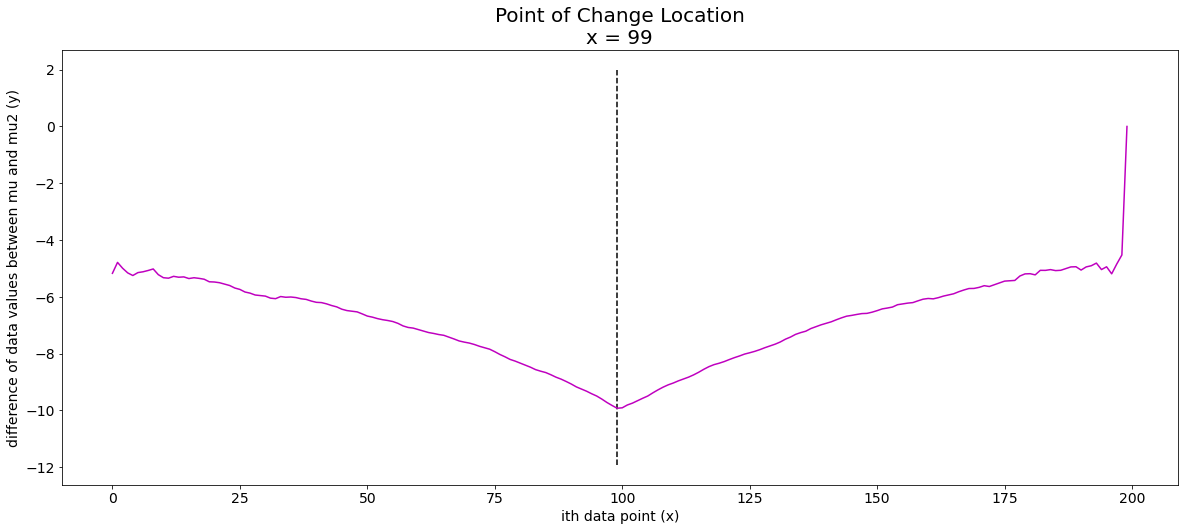

In [ ]:
# plot
plt.figure(figsize=(20,8));
plt.plot(dif, "m"); 
plt.vlines(x=poc_loc[0][0],  ymin=np.nanmin(dif)-2, ymax = np.nanmax(dif)+2, color = 'k', linestyles= "dashed")
plt.title(f"Point of Change Location\nx = {poc_loc[0][0]}", size = 20);
plt.xlabel("ith data point (x)", size = 14);
plt.ylabel("difference of data values between mu and mu2 (y)", size = 14);
plt.yticks(size = 14);
plt.xticks(size = 14);

**Fig. 4.** Difference in mean value at each data point x between mu and mu2. The (absolute) difference is maximized at the PoC. To access the index of the PoC programmatically, we find the minimum value in the difference array, which represent the largest absolute difference. The PoC is 100 or close to 100, because we took 100 datpoints from the first and 100 datapoints from the second distribution. 

# **Find PoC based on a Naive Variance Change Assessment:**

In [ ]:
variance = np.zeros(ts.shape[0])
variance2 = np.zeros(ts.shape[0])

for i in range(0,ts.shape[0]-1):
    variance[i] = ts[0:i+1].var()
    variance2[i] = ts[i:].var()

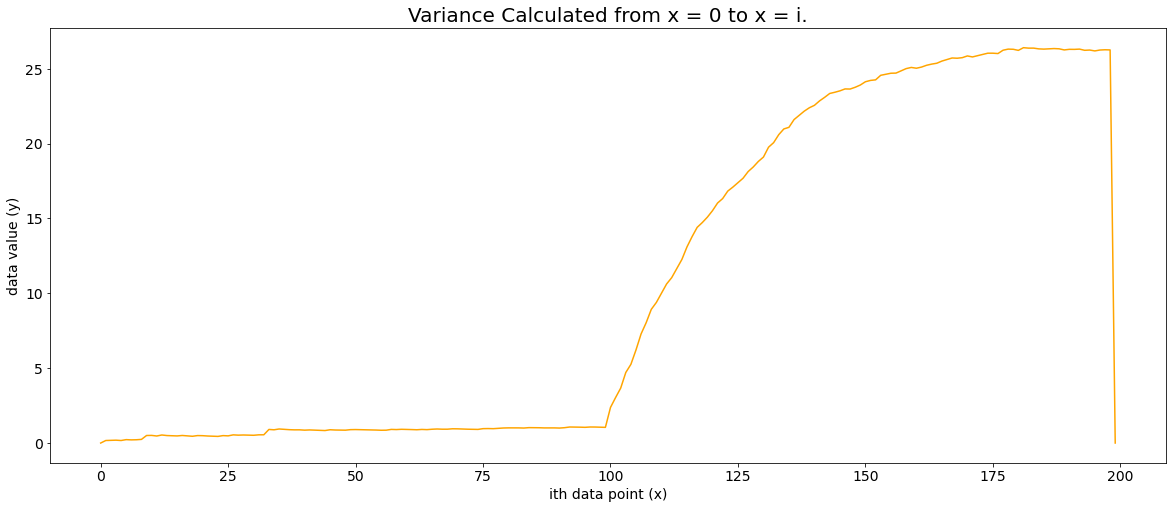

In [ ]:
# plot
plt.figure(figsize=(20,8));
plt.plot(variance, color = "orange") 
plt.title("Variance Calculated from x = 0 to x = i.",size =20)
plt.xlabel("ith data point (x)", size = 14);
plt.ylabel("data value (y)", size = 14);
plt.yticks(size = 14);
plt.xticks(size = 14);

**Fig. 5.**  Variance calculated over x = 0 to x = i. Initially, the variance is at a low and steady level because only data points with mean 0 are considered. After the PoC the variance increases steadily to approximately 27. This is because the second half of the data has a different mean than the first half. As more data points from the second half are considered, the variance of the dataset increases. 

**What is the drop at the end?**

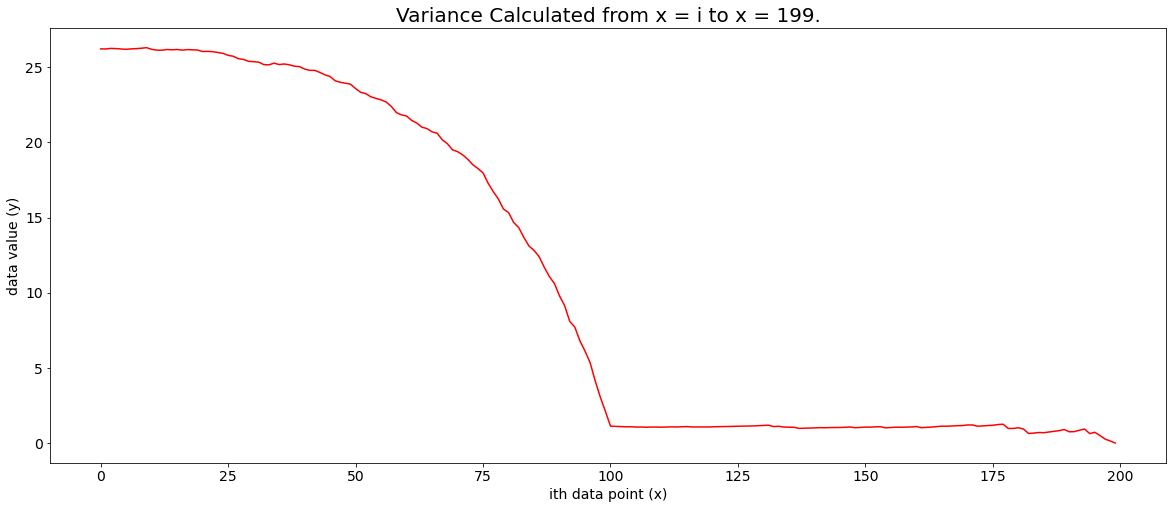

In [ ]:
# plot
plt.figure(figsize=(20,8));
plt.plot(variance2, color = "red") 
plt.title("Variance Calculated from x = i to x = 199.",size =20)
plt.xlabel("ith data point (x)", size = 14);
plt.ylabel("data value (y)", size = 14);
plt.yticks(size = 14);
plt.xticks(size = 14);

**Fig. 6.** Variance calculated across x = i to x = 199. 

The variance values starts out at approximately 27 and steadily decreases up to the PoC. This is because increasingly fewer datapoints are considered for the variance assessment. After the PoC, the variance value remains at a steady low level because only data points from the distribution with mean 0 are being considered. Fig. 6 is the mirror image of fig. 5. 

In [ ]:
dif_var = variance-variance2

max_dif_var = np.nanmax(abs(dif_var[5:196])) # avoid edges
min_dif_var = np.nanmin(abs(dif_var[5:196])) # avoid edges

print(f"The largest difference between variance and variance2 is {round(max_dif_var,1)} and the smallest difference is {round(min_dif_var,1)}.")

The largest difference between variance and variance2 is 26.0 and the smallest difference is 1.1.


In [ ]:
# Find index of PoC
try:
  poc_loc_var = np.where(dif_var == np.nanminabs(dif_var[5:196]))
except:
  poc_loc_var = np.where(dif_var == np.nanmin(abs(dif_var[5:196]))*-1)

print(f"The point of change is located at index x = {poc_loc_var[0][0]}.")

The point of change is located at index x = 99.


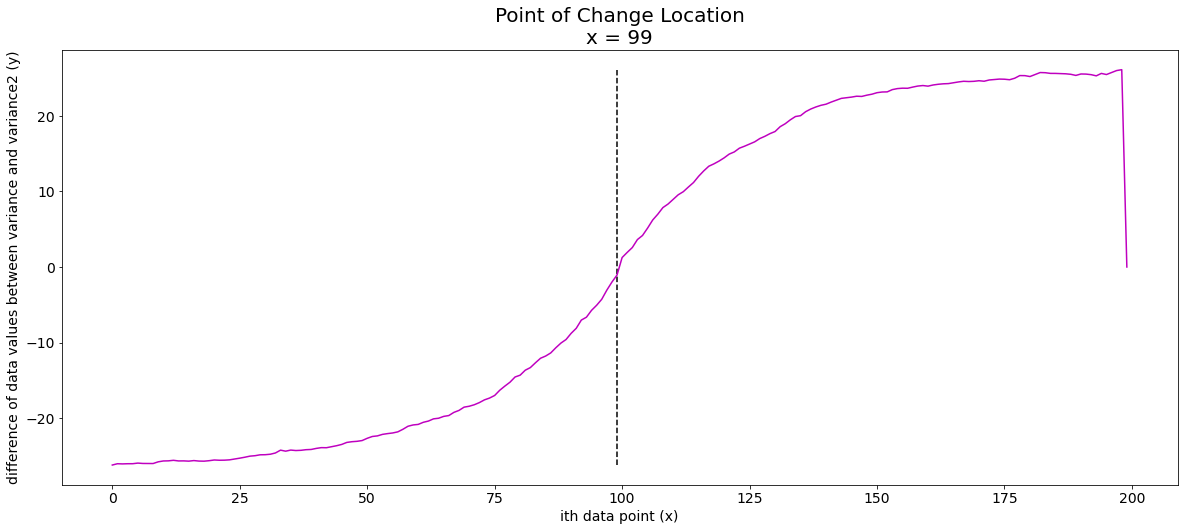

In [ ]:
# plot
plt.figure(figsize=(20,8));
plt.plot(dif_var, "m"); 
plt.vlines(x=poc_loc_var[0][0],  ymin=np.nanmin(dif_var), ymax = np.nanmax(dif_var), color = 'k', linestyles= "dashed")
plt.title(f"Point of Change Location\nx = {poc_loc_var[0][0]}", size = 20);
plt.xlabel("ith data point (x)", size = 14);
plt.ylabel("difference of data values between variance and variance2 (y)", size = 14);
plt.yticks(size = 14);
plt.xticks(size = 14);

**Fig. 7.** Difference in variance value at each data point x between variance and variance2. The steepest point of the slope is at the PoC. To access the index of the PoC programmatically, we find the minimum absolute value in the difference array. The PoC is 100 or close to 100, because we took 100 datpoints from the first and 100 datapoints from the second distribution.

# **Find PoC based on Mean Squared Error Change:**

In [ ]:
mse1 = np.zeros(ts.shape[0])
mse2 = np.zeros(ts.shape[0])

for i in range(0,ts.shape[0]-1):
    mse1[i] = ((ts[i]-ts1[:].mean())**2)/ts.shape
    mse2[i] = ((ts[i]-ts2[:].mean())**2)/ts.shape

In [ ]:
mse = np.zeros(ts.shape[0])
mse1 = np.zeros(mse.shape[0])
mse2 = np.zeros(mse.shape[0])

for i in range(0,ts.shape[0]-1):
    mse[i] = ((ts[i]-ts.mean())**2)
    mse1[i] = ((ts[i]-ts[0:i+1].mean())**2)
    mse2[i] = ((ts[i]-ts[i:].mean())**2)

mse_poc = mse1 + mse2

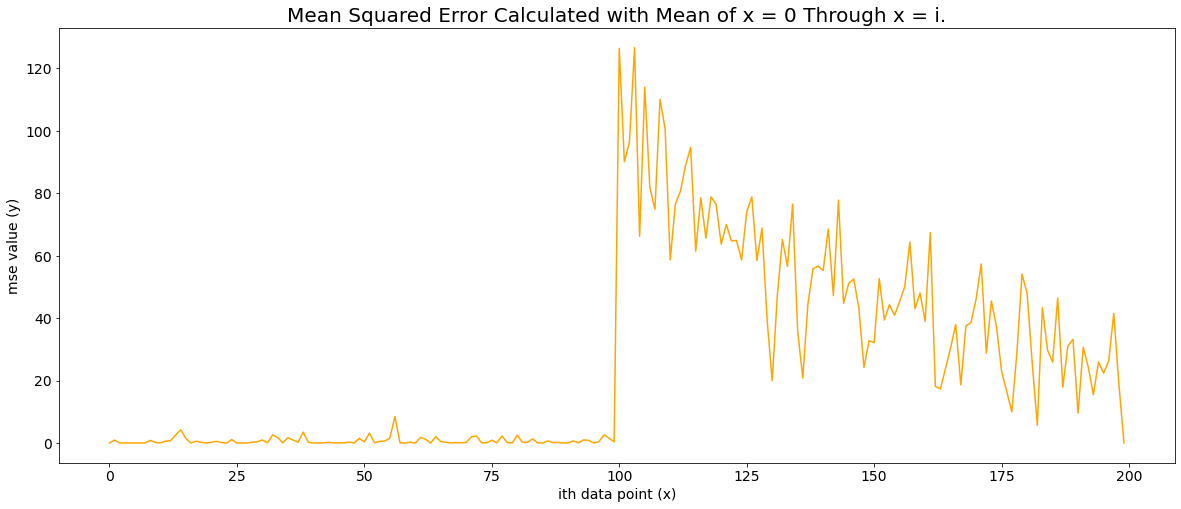

In [ ]:
# plot
plt.figure(figsize=(20,8));
plt.plot(mse1, color = "orange") 
plt.title("Mean Squared Error Calculated with Mean of x = 0 Through x = i.",size =20)
plt.xlabel("ith data point (x)", size = 14);
plt.ylabel("mse value (y)", size = 14);
plt.yticks(size = 14);
plt.xticks(size = 14);

**Fig. 8.** Mean squared error calculated over x = 0 to x = i. Initially, the mse is low because the mean of the data is very close to the predicted mean. At the point of change, the mse increases abruptly, because at this datapoint, the data begins to differ from the expected mean. It decreases as more datapoints are added.

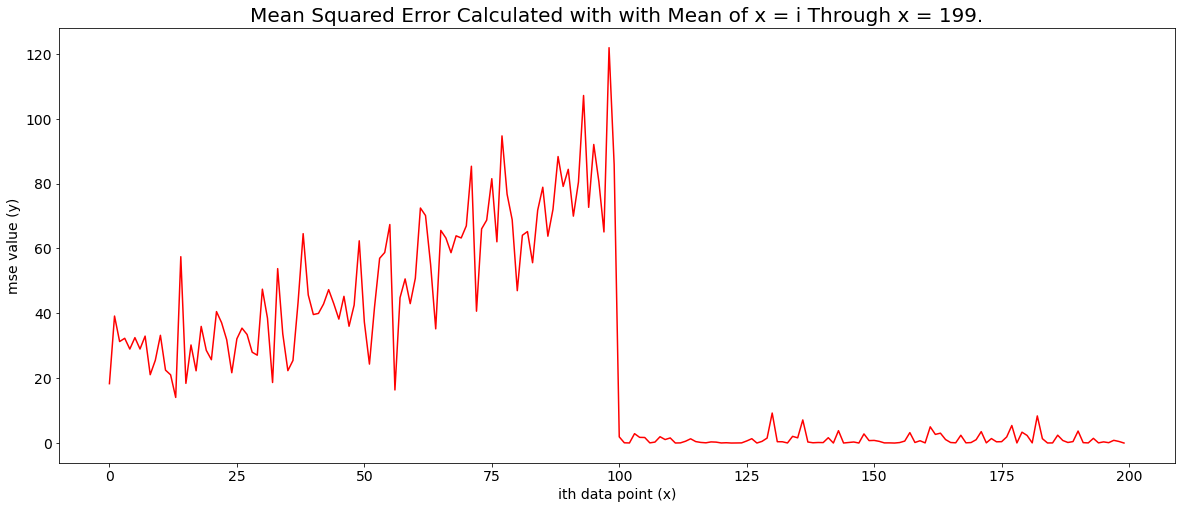

In [ ]:
# plot
plt.figure(figsize=(20,8));
plt.plot(mse2, color = "red") 
plt.title("Mean Squared Error Calculated with with Mean of x = i Through x = 199.",size =20)
plt.xlabel("ith data point (x)", size = 14);
plt.ylabel("mse value (y)", size = 14);
plt.yticks(size = 14);
plt.xticks(size = 14);

**Fig. 9.** Mean squared error calculated over x = i to x = 199. Initially, the mse increases slowly, because fewer datapoints are compared to the mean. At the point of change, the mse drops abruptly, because at this datapoint, the data begins to assimilate the expected mean.

In [ ]:
# find maximum and its index
mse_poc_max = np.nanmax(mse_poc)
mse_poc_loc = np.where(mse_poc == np.nanmax(mse_poc))
mse_poc_loc

(array([103]),)

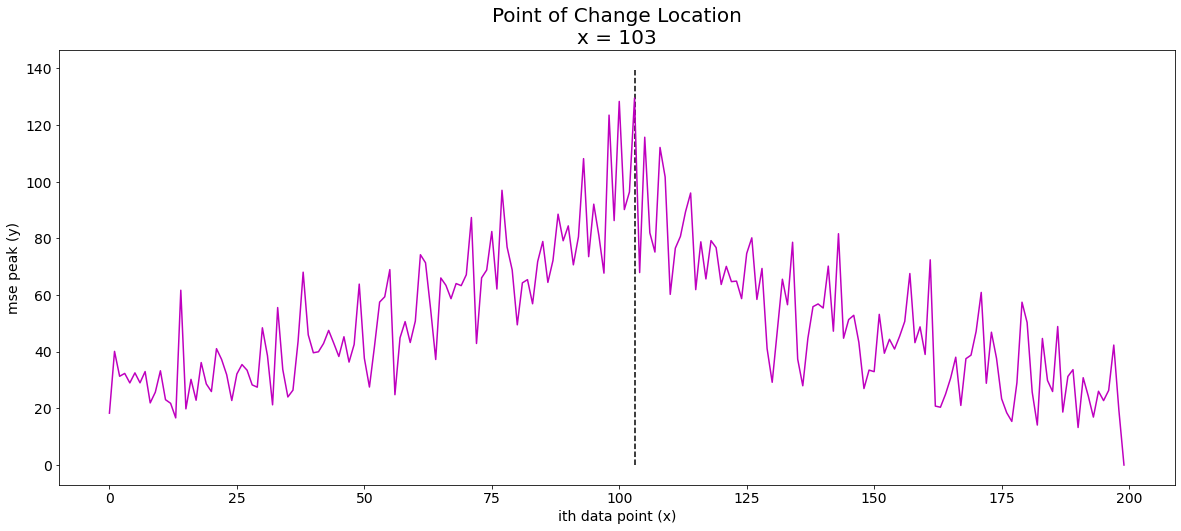

In [ ]:
# plot
plt.figure(figsize=(20,8));
plt.plot(mse_poc, "m"); 
plt.vlines(x=mse_poc_loc[0][0],  ymin=np.nanmin(mse_poc), ymax = np.nanmax(mse_poc)+10, color = 'k', linestyles= "dashed")
plt.title(f"Point of Change Location\nx = {mse_poc_loc[0][0]}", size = 20);
plt.xlabel("ith data point (x)", size = 14);
plt.ylabel("mse peak (y)", size = 14);
plt.yticks(size = 14);
plt.xticks(size = 14);

**Fig. 10.** Combined mean squared error at each data point x. The maximum is the point of change. To access the index of the PoC programmatically, we find the maximum value of the array. The PoC is 100 or close to 100, because we took 100 datpoints from the first and 100 datapoints from the second distribution.